In [193]:
import os
import sys
#import urllib.request
import pandas as pd
import glob
import csv
import pymc3 as pm
import numpy as np
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f', 'diff']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [194]:
turnstile_all_stations = pd.read_csv('./turnstile_data_ads_1718.csv')

In [195]:
turnstile_all_stations.head()

,Unnamed: 0,C/A,UNIT,SCP,DATE,TIME,ENTRIES,DATETIME,DESC,LINENAME,STATION
0,0,R205A,R014,04-03-01,2016-12-30,23:00:00,2105940,2016-12-30 23:00:00,REGULAR,2345ACJZ,FULTON ST
1,1,N213,R154,00-00-02,2016-12-30,23:00:00,2861061,2016-12-30 23:00:00,REGULAR,BD,TREMONT AV
2,2,H041,R152,00-05-01,2016-12-30,23:00:00,262144,2016-12-30 23:00:00,REGULAR,L,CANARSIE-ROCKAW
3,3,A058,R001,01-06-01,2016-12-30,23:00:00,1253156,2016-12-30 23:00:00,REGULAR,R1W,WHITEHALL S-FRY
4,4,R230,R143,02-06-00,2016-12-30,23:00:00,39927,2016-12-30 23:00:00,REGULAR,6,28 ST


In [196]:
turnstile_all_stations.drop(['Unnamed: 0'],axis=1,inplace=True)

In [201]:
turnstile_all_stations['MACHINE'] = turnstile_all_stations['C/A'] +  '-' + turnstile_all_stations['UNIT'] + '-' + turnstile_all_stations['SCP']+  '-' + turnstile_all_stations['STATION'] +  '-' + turnstile_all_stations['LINENAME']

In [202]:
td = turnstile_all_stations.sort_values(by=['MACHINE' ,'DATETIME'])

In [203]:
td['ENTRY_DIFF'] = td.groupby(['MACHINE'],as_index=False)['ENTRIES'].transform(lambda x: x.diff())

In [204]:
td = td[(td['ENTRY_DIFF'] > 0) & (td['ENTRY_DIFF'] < 14400) ]

In [205]:
td['DATETIME'] = pd.to_datetime(td['DATETIME'])

In [206]:
td['HOUR'] = td['DATETIME'].dt.hour

In [16]:
td[['DATE','TIME','MACHINE','ENTRY_DIFF','STATION','HOUR']][td['STATION']  == 'GRD CNTRL-42 ST'].groupby(['DATE' , 'HOUR']).sum()

ENTRY_DIFF
DATE       HOUR            
2016-12-31 3          850.0
           7          971.0
           11        7075.0
           15       16020.0
           19       20561.0
           23       13071.0
2017-01-01 3         6357.0
           7         1510.0
           11        4039.0
           15       11629.0
           19       13069.0
           23        8366.0
2017-01-02 3         1921.0
           7          830.0
           11        7534.0
           15        7035.0
           19       25951.0
           23        8658.0
2017-01-03 3         1500.0
           7         6985.0
           11       32790.0
           15       24534.0
           19       75231.0
           23       16600.0
2017-01-04 3         2566.0
           7         6718.0
           11       33117.0
           15       24620.0
           19       71851.0
           23       19209.0
...                     ...
2018-12-03 3         1513.0
           7         6776.0
           11       35760.0
           15       24765.0
           19       72793.0
           23       20321.0
2018-12-04 3         2853.0
           7         7158.0
           11       37122.0
           15       27351.0
           19       75914.0
           23       22291.0
2018-12-05 3         3062.0
           7         6606.0
           11       35598.0
           15       28410.0
           19       73861.0
           23       22177.0
2018-12-06 3         3240.0
           7         6862.0
           11       36945.0
           15       28344.0
           19       75262.0
           23       23813.0
2018-12-07 3         3585.0
           7         6147.0
           11       32446.0
           15       31188.0
           19       70702.0
           23       13950.0

[3949 rows x 1 columns]

In [74]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(pd.Series(gcounts.ENTRY_DIFF[0:50]))
result

(-1.5854484653797511,
 0.49089899400753739,
 7,
 42,
 {'1%': -3.5966356360004319,
  '10%': -2.6049909750566895,
  '5%': -2.9332973318216178},
 831.4947114540895)

In [207]:
entries = gst_counts_4hourly ['ENTRY_DIFF'][:-10]
entries_test = gst_counts_4hourly ['ENTRY_DIFF'][-10:]

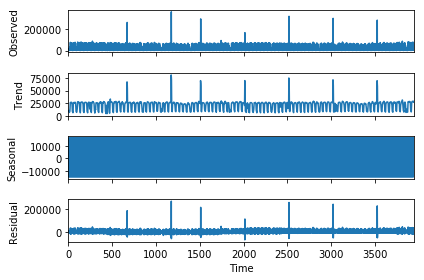

In [209]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(gst_counts_4hourly.ENTRY_DIFF.values , freq=6)


result.plot()
pyplot.show()
pl.savefig('decom.png')

In [210]:
entries_log = np.log(entries)
entries_log_diff1 = (entries_log - entries_log.shift(6)).dropna()

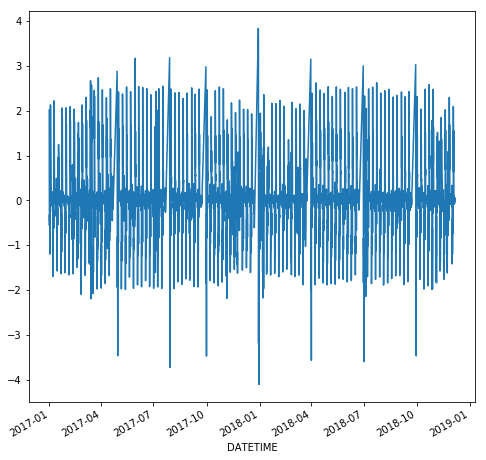

In [211]:
entries_log_diff1.plot(figsize = (8,8))
pl.savefig('diffts.png')

In [212]:
from statsmodels.tsa.stattools import acf, pacf

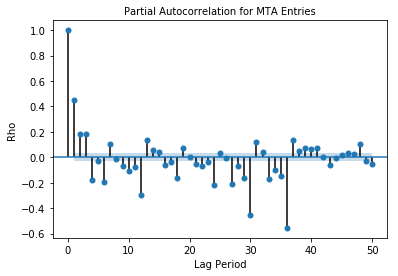

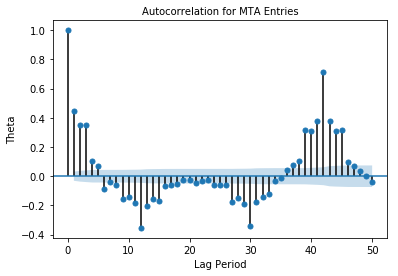

In [213]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig = pl.figure(figsize=(8,6))
fig = plot_pacf(entries_log_diff1 ,lags=50)
pl.title('Partial Autocorrelation for MTA Entries', fontsize=10)
pl.xlabel('Lag Period')
pl.ylabel('Rho')
pl.savefig('fig2')

# autocorrealation estimate MA parameter
fig = pl.figure(figsize=(8,6))
fig = plot_acf(entries_log_diff1 , lags=50)
pl.title('Autocorrelation for MTA Entries', fontsize=10)
pl.xlabel('Lag Period')
pl.ylabel('Theta')
pl.savefig('fig3')


In [262]:
from statsmodels.tsa.arima_model import ARIMA,ARMA

# global activ power
#for ARMA package of statsmodels use the lag of the log values to predict
# ar =1, ma =0
model2 = ARIMA(entries_log_diff1, order=(7,0,5))  
results_AR = model2.fit()  
results_AR.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             ENTRY_DIFF   No. Observations:                 3933
Model:                     ARMA(7, 5)   Log Likelihood               -3248.532
Method:                       css-mle   S.D. of innovations              0.552
Date:                Tue, 18 Dec 2018   AIC                           6525.065
Time:                        08:06:29   BIC                           6612.945
Sample:                             0   HQIC                          6556.243
                                                                              
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             7.399e-05      0.000      0.643      0.520      -0.000       0.000
ar.L1.ENTRY_DIFF    -0.1587      0.117     -1.362      0.173      -0.387       0.070
ar.L2.ENTRY_DIFF     0.0141      0.043      0.330      0.741      -0.070       0.098
ar.L3.ENTRY_DIFF     1.2012      0.035     34.158      0.000       1.132       1.270
ar.L4.ENTRY_DIFF     0.1681      0.131      1.278      0.201      -0.090       0.426
ar.L5.ENTRY_DIFF    -0.0178      0.033     -0.540      0.589      -0.082       0.047
ar.L6.ENTRY_DIFF    -0.5423      0.028    -19.166      0.000      -0.598      -0.487
ar.L7.ENTRY_DIFF    -0.0645      0.057     -1.126      0.260      -0.177       0.048
ma.L1.ENTRY_DIFF     0.5027      0.116      4.323      0.000       0.275       0.731
ma.L2.ENTRY_DIFF     0.2796      0.082      3.401      0.001       0.118       0.441
ma.L3.ENTRY_DIFF    -0.9808      0.003   -328.166      0.000      -0.987      -0.975
ma.L4.ENTRY_DIFF    -0.5154      0.113     -4.556      0.000      -0.737      -0.294
ma.L5.ENTRY_DIFF    -0.2840      0.084     -3.390      0.001      -0.448      -0.120
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0861           -0.2303j            1.1103           -0.0333
AR.2            1.0861           +0.2303j            1.1103            0.0333
AR.3           -0.3589           -1.0457j            1.1056           -0.3026
AR.4           -0.3589           +1.0457j            1.1056            0.3026
AR.5           -0.7464           -0.8199j            1.1088           -0.3675
AR.6           -0.7464           +0.8199j            1.1088            0.3675
AR.7           -8.3692           -0.0000j            8.3692           -0.5000
MA.1            1.0004           -0.0000j            1.0004           -0.0000
MA.2           -0.4989           -0.8816j            1.0130           -0.3320
MA.3           -0.4989           +0.8816j            1.0130            0.3320
MA.4           -0.9088           -1.6139j            1.8522           -0.3316
MA.5           -0.9088           +1.6139j            1.8522            0.3316
-----------------------------------------------------------------------------
"""

In [264]:
from statsmodels.tsa.arima_model import ARIMA,ARMA

# global activ power
#for ARMA package of statsmodels use the lag of the log values to predict
# ar =1, ma =0
model = ARMA(entries_log_diff1, order=(4,4))  
results_AR2 = model.fit(trend='nc')  
print(results_AR2.summary())

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:             ENTRY_DIFF   No. Observations:                 3933
Model:                     ARMA(4, 4)   Log Likelihood               -3361.178
Method:                       css-mle   S.D. of innovations              0.568
Date:                Tue, 18 Dec 2018   AIC                           6740.355
Time:                        08:07:25   BIC                           6796.849
Sample:                             0   HQIC                          6760.398
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
ar.L1.ENTRY_DIFF     0.8498      0.067     12.594      0.000       0.718       0.982
ar.L2.ENTRY_DIFF    -0.0817      0.032     -2.564      0.010      -0.144      -0.019
ar.L3.ENTRY_DIFF    -0.4918 

In [216]:
pd.DataFrame(results_AR.resid).describe()

,0
count,3933.000000
mean,0.006689
std,0.553115
min,-4.834413
25%,-0.182211
50%,0.036296
75%,0.227369
max,4.136353


In [217]:
pd.DataFrame(results_AR2.resid).describe()

,0
count,3933.000000
mean,0.000752
std,0.569157
min,-4.643495
25%,-0.153034
50%,0.008496
75%,0.138846
max,3.892909


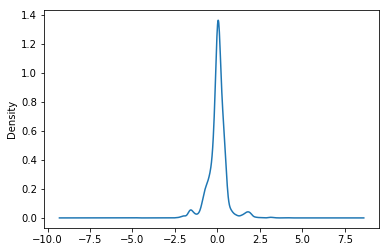

In [218]:
results_AR1.resid.plot(kind='kde')
pl.savefig('fig10')

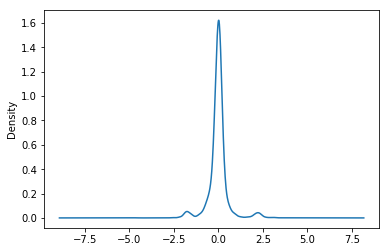

In [219]:
results_AR2.resid.plot(kind='kde')
pl.savefig('fig4')

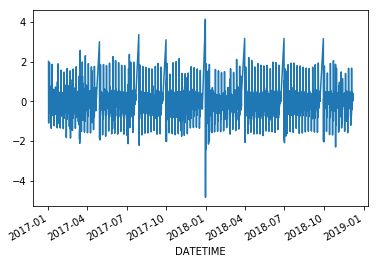

In [220]:
results_AR.resid.plot()
pl.savefig('fig5')

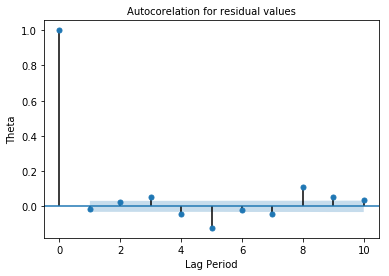

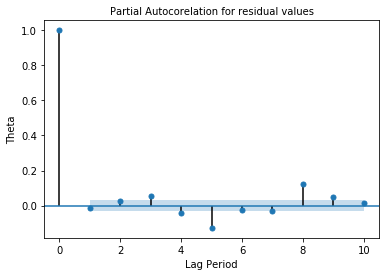

In [253]:
fig = pl.figure(figsize=(8,6))
fig = plot_acf(results_AR2.resid, lags=10)
pl.title('Autocorelation for residual values', fontsize=10)
pl.xlabel('Lag Period')
pl.ylabel('Theta')
pl.savefig('fig3')


fig = pl.figure(figsize=(8,6))
fig = plot_pacf(results_AR2.resid, lags=10)
pl.title('Partial Autocorelation for residual values', fontsize=10)
pl.xlabel('Lag Period')
pl.ylabel('Theta')
pl.savefig('fig3')

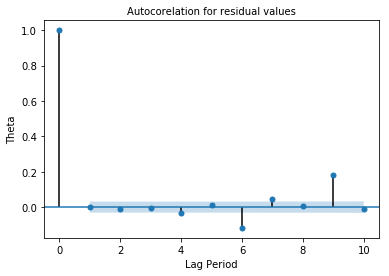

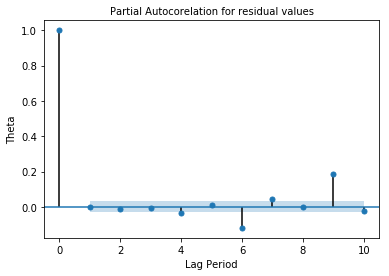

In [222]:
fig = pl.figure(figsize=(8,6))
fig = plot_acf(results_AR1.resid, lags=10)
pl.title('Autocorelation for residual values', fontsize=10)
pl.xlabel('Lag Period')
pl.ylabel('Theta')
pl.savefig('fig3')


fig = pl.figure(figsize=(8,6))
fig = plot_pacf(results_AR1.resid, lags=10)
pl.title('Partial Autocorelation for residual values', fontsize=10)
pl.xlabel('Lag Period')
pl.ylabel('Theta')
pl.savefig('fig3')

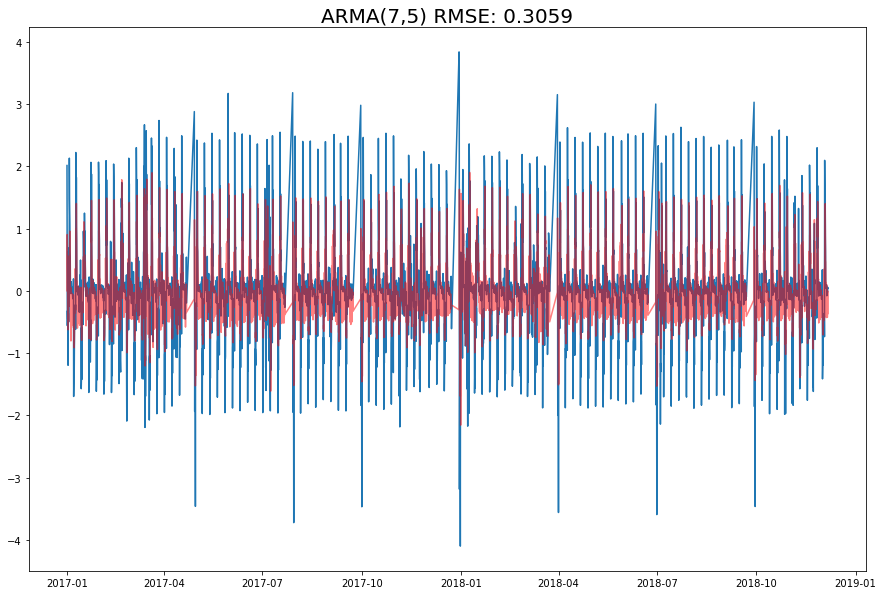

In [260]:
fig = pl.figure(figsize=(15,10))
pl.plot(entries_log_diff1)
pl.plot(results_AR1.fittedvalues, color='red',alpha=0.5)


diff = ((results_AR1.fittedvalues-entries_log_diff1)**2).mean()
pl.title('ARMA(7,5) RMSE: %.4f'% diff , fontsize=20.)
pl.savefig('fig6')

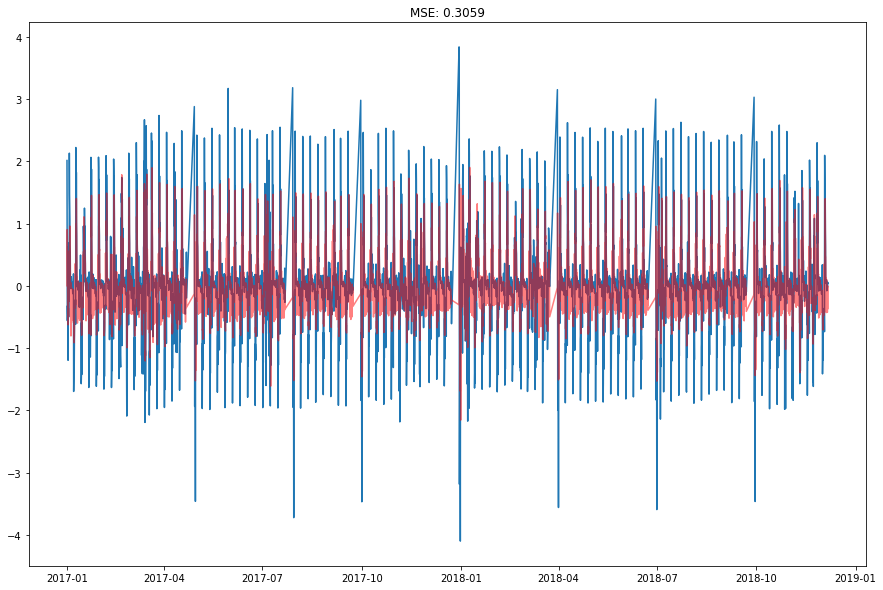

In [189]:
fig = pl.figure(figsize=(15,10))
pl.plot(entries_log_diff1)
pl.plot(results_AR1.fittedvalues, color='red',alpha=0.5)


diff = ((results_AR1.fittedvalues-entries_log_diff1)**2).mean()
pl.title('MSE: %.4f'% diff)
pl.savefig('fig6')

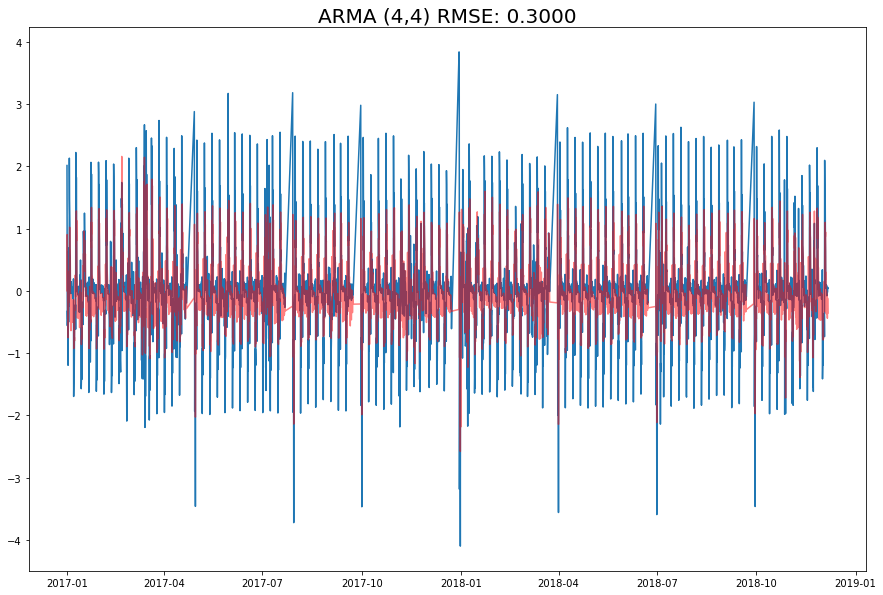

In [252]:
fig = pl.figure(figsize=(15,10))
pl.plot(entries_log_diff1)
pl.plot(results_AR2.fittedvalues, color='red',alpha=0.5)


diff = ((results_AR2.fittedvalues-entries_log_diff1)**2).mean()
pl.title('ARMA (4,4) RMSE: %.4f'% diff ,fontsize = 20)
pl.savefig('fig6')

In [255]:
def inverse_difference(history, yhat, interval=6):
    y_hat_antilog = np.exp(yhat)
    return y_hat_antilog + history[-(interval)]


predictions1= []
predictions2 = []

history1 = [x for x in entries]

test_data_list1 = [x for x in entries_test]


forecast1 = results_AR1.forecast(steps=10)[0]
forecast2 = results_AR2.forecast(steps=10)[0]


In [235]:
for i in range(len(forecast1)):

    yhat = inverse_difference(history1, forecast1[i])
    predictions1.append(yhat)
    # observation
    obs = test_data_list1[i]
    history1.append(obs)
    print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))

>Predicted=35598.855, Expected=36945
>Predicted=28410.931, Expected=28344
>Predicted=73861.671, Expected=75262
>Predicted=22177.711, Expected=23813
>Predicted=3240.811, Expected=3585
>Predicted=6862.615, Expected=6147
>Predicted=36945.727, Expected=32446
>Predicted=28344.811, Expected=31188
>Predicted=75262.696, Expected=70702
>Predicted=23813.822, Expected=13950


In [256]:
for i in range(len(forecast2)):

    yhat = inverse_difference(history1, forecast2[i])
    predictions2.append(yhat)
    # observation
    obs = test_data_list1[i]
    history1.append(obs)
    print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))

>Predicted=35598.861, Expected=36945
>Predicted=28410.873, Expected=28344
>Predicted=73861.636, Expected=75262
>Predicted=22177.716, Expected=23813
>Predicted=3240.790, Expected=3585
>Predicted=6862.586, Expected=6147
>Predicted=36945.734, Expected=32446
>Predicted=28344.768, Expected=31188
>Predicted=75262.688, Expected=70702
>Predicted=23813.792, Expected=13950


In [237]:
predictions_series1 = pd.Series(predictions1)
predictions_series1.index = entries_test.index
predictions_series1

DATETIME
2018-12-06 11:00:00    35598.854718
2018-12-06 15:00:00    28410.930620
2018-12-06 19:00:00    73861.671170
2018-12-06 23:00:00    22177.710668
2018-12-07 03:00:00     3240.811432
2018-12-07 07:00:00     6862.615295
2018-12-07 11:00:00    36945.726604
2018-12-07 15:00:00    28344.811161
2018-12-07 19:00:00    75262.696011
2018-12-07 23:00:00    23813.821631
dtype: float64

RMSE: 3918.015


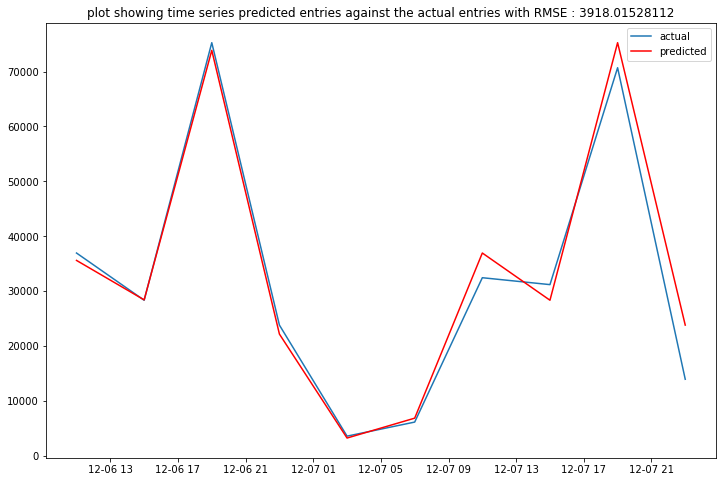

In [238]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(entries_test, predictions_series1)
rmse = np.sqrt(mse)
print('RMSE: %.3f' % rmse)
pl.figure(figsize=(12,8))
pl.plot(entries_test,label='actual')
pl.plot(predictions_series1, color='red',label='predicted')
pl.legend()
pl.title('plot showing time series predicted entries against the actual entries with RMSE : ' + str(rmse))
pl.savefig('fig9')

In [257]:
predictions_series2 = pd.Series(predictions2)
predictions_series2.index = entries_test.index
predictions_series2

DATETIME
2018-12-06 11:00:00    35598.860990
2018-12-06 15:00:00    28410.873248
2018-12-06 19:00:00    73861.636361
2018-12-06 23:00:00    22177.715529
2018-12-07 03:00:00     3240.790018
2018-12-07 07:00:00     6862.586343
2018-12-07 11:00:00    36945.734134
2018-12-07 15:00:00    28344.767558
2018-12-07 19:00:00    75262.687832
2018-12-07 23:00:00    23813.792436
dtype: float64

RMSE: 3918.011


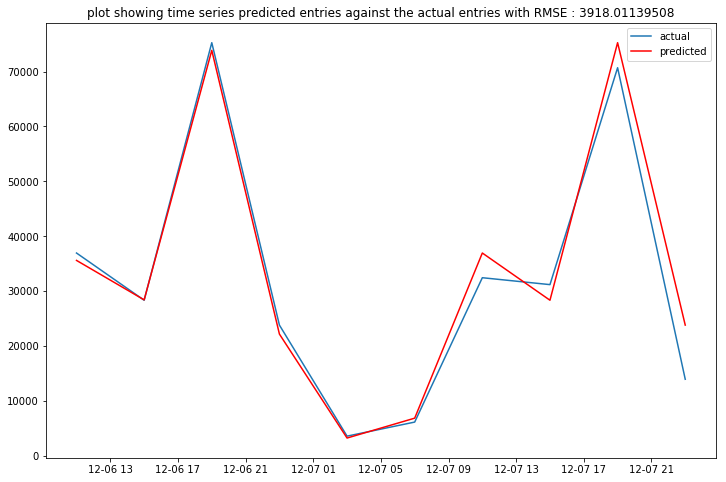

In [258]:
mse = mean_squared_error(entries_test, predictions_series2)
rmse = np.sqrt(mse)
print('RMSE: %.3f' % rmse)
pl.figure(figsize=(12,8))
pl.plot(entries_test,label='actual')
pl.plot(predictions_series1, color='red',label='predicted')
pl.legend()
pl.title('plot showing time series predicted entries against the actual entries with RMSE : ' + str(rmse))
pl.savefig('fig9')